In [1]:
import pandas as pd

In [2]:
# Load the dataset
train = pd.read_csv('/Users/arunaa/Python/Sracasam/sarcasm_tam_train.csv')
test = pd.read_csv('/Users/arunaa/Python/Sracasam/sarcasm_tam_test_without_labels.csv')

In [3]:
# Inspect the data
print(train.head())
print(test.head())

                                                Text         labels
0  அர்யவுக்கு  ஒரு நல்ல வாய்ப்பு சிங்கம் சூரியா அ...  Non-sarcastic
1  பள்ளியோ கல்லூரியோ படித்துக்கொண்டிருக்கும்போது ...  Non-sarcastic
2  தல தல தல தல தல தல தல தல தல தல தல தல தல தல தல த...  Non-sarcastic
3  All the best to the team....super ah na Oru ka...  Non-sarcastic
4  Bahut over mack up kiya hua hai, it is look li...  Non-sarcastic
      ID                                               Text
0  Id_01      Kangana wow  awesome yr ye lakdi sbae alh hai
1  Id_02  விழுப்புரம்  வன்னிய கவுண்டர் சார்பாக வாழ்த்துக...
2  Id_03  திரௌபதி திரைப்படம் வெற்றி பெற வாணியர் சமுதாயம்...
3  Id_04  இந்த திரைப்படம் வெற்றிபெற, ஆதி தமிழன் அதாவது இ...
4  Id_05  dai thala pera sonnalay summa tamil naday athi...


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

In [5]:
# Extract features and labels from the training data
X_train = train['Text']
y_train = train['labels']

In [7]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

NameError: name 'X' is not defined

In [8]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(test['Text'])

In [9]:
# Pad sequences
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [10]:
# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [11]:
# Convert to numpy arrays
X_train_pad = np.array(X_train_pad)
X_test_pad = np.array(X_test_pad)
y_train_encoded = np.array(y_train_encoded)

In [12]:
# Split the training data into training and validation sets
X_train_pad, X_val_pad, y_train_encoded, y_val_encoded = train_test_split(X_train_pad, y_train_encoded, test_size=0.2, random_state=42)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [14]:
# Define the RNN model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(128),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [15]:
# Compile the model using class weights to address imbalance
class_weights = {0: 1., 1: len(y_train_encoded) / sum(y_train_encoded)}
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train the model
history = model.fit(X_train_pad, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_val_pad, y_val_encoded), class_weight=class_weights)

Epoch 1/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 71s 95ms/step - accuracy: 0.2992 - loss: 1.1795 - val_accuracy: 0.2699 - val_loss: 0.7556
Epoch 2/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 70s 95ms/step - accuracy: 0.2619 - loss: 1.1827 - val_accuracy: 0.2699 - val_loss: 0.7949
Epoch 3/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 106s 144ms/step - accuracy: 0.2647 - loss: 1.1866 - val_accuracy: 0.2699 - val_loss: 0.7769
Epoch 4/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 69s 94ms/step - accuracy: 0.2667 - loss: 1.1887 - val_accuracy: 0.2699 - val_loss: 0.7712
Epoch 5/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 69s 94ms/step - accuracy: 0.2603 - loss: 1.1802 - val_accuracy: 0.2699 - val_loss: 0.7707
Epoch 6/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 70s 95ms/step - accuracy: 0.2668 - loss: 1.1880 - val_accuracy: 0.2699 - val_loss: 0.7611
Epoch 7/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 70s 94ms/step - accuracy: 0.2681 - loss: 1.1902 - val_accuracy: 0.2699 - val_loss: 0.7825
Epoch 8/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 85s 114ms/step - accuracy: 0.2627 - loss: 1.1831

In [17]:
from sklearn.metrics import classification_report

In [18]:
# Predict on the validation data
y_val_pred = model.predict(X_val_pad)
y_val_pred = (y_val_pred > 0.5).astype(int)

185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step


In [19]:
# Calculate accuracy, precision, f1 score, and support
report = classification_report(y_val_encoded, y_val_pred, target_names=label_encoder.classes_)
print(report)

               precision    recall  f1-score   support

Non-sarcastic       0.00      0.00      0.00      4318
    Sarcastic       0.27      1.00      0.43      1596

     accuracy                           0.27      5914
    macro avg       0.13      0.50      0.21      5914
 weighted avg       0.07      0.27      0.11      5914



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
# Predict on the test data
y_test_pred = model.predict(X_test_pad)
y_test_pred = (y_test_pred > 0.5).astype(int)

199/199 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step


In [21]:
# Output predictions
test['predicted_label'] = label_encoder.inverse_transform(y_test_pred.flatten())
print(test.head())

      ID                                               Text predicted_label
0  Id_01      Kangana wow  awesome yr ye lakdi sbae alh hai       Sarcastic
1  Id_02  விழுப்புரம்  வன்னிய கவுண்டர் சார்பாக வாழ்த்துக...       Sarcastic
2  Id_03  திரௌபதி திரைப்படம் வெற்றி பெற வாணியர் சமுதாயம்...       Sarcastic
3  Id_04  இந்த திரைப்படம் வெற்றிபெற, ஆதி தமிழன் அதாவது இ...       Sarcastic
4  Id_05  dai thala pera sonnalay summa tamil naday athi...       Sarcastic


In [22]:
import matplotlib.pyplot as plt

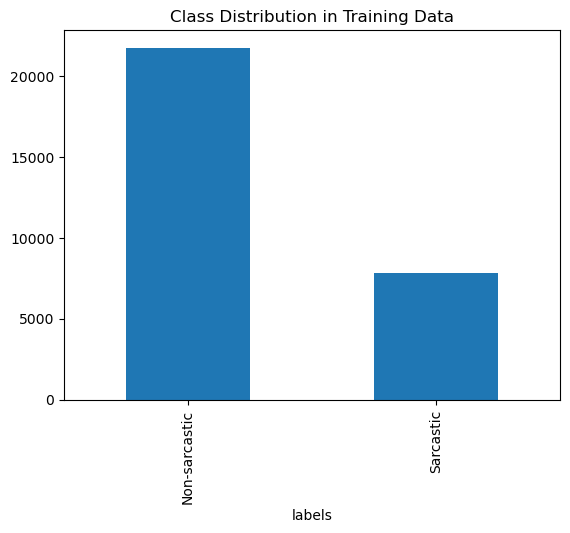

In [23]:
# Check the distribution of the classes
train['labels'].value_counts().plot(kind='bar')
plt.title('Class Distribution in Training Data')
plt.show()

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pad, y_train_encoded)

In [26]:
# Split the resampled data into training and validation sets
X_train_pad, X_val_pad, y_train_encoded, y_val_encoded = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

In [28]:
# Define the RNN model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(128)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [29]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Train the model
history = model.fit(X_train_pad, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_val_pad, y_val_encoded))

Epoch 1/10
872/872 ━━━━━━━━━━━━━━━━━━━━ 199s 226ms/step - accuracy: 0.4947 - loss: 0.6945 - val_accuracy: 0.5074 - val_loss: 0.6931
Epoch 2/10
872/872 ━━━━━━━━━━━━━━━━━━━━ 200s 229ms/step - accuracy: 0.5013 - loss: 0.6937 - val_accuracy: 0.5074 - val_loss: 0.6937
Epoch 3/10
872/872 ━━━━━━━━━━━━━━━━━━━━ 199s 228ms/step - accuracy: 0.4999 - loss: 0.6937 - val_accuracy: 0.4926 - val_loss: 0.6972
Epoch 4/10
872/872 ━━━━━━━━━━━━━━━━━━━━ 200s 230ms/step - accuracy: 0.5031 - loss: 0.6935 - val_accuracy: 0.4926 - val_loss: 0.6935
Epoch 5/10
872/872 ━━━━━━━━━━━━━━━━━━━━ 216s 248ms/step - accuracy: 0.5084 - loss: 0.6932 - val_accuracy: 0.5074 - val_loss: 0.6931
Epoch 6/10
872/872 ━━━━━━━━━━━━━━━━━━━━ 219s 251ms/step - accuracy: 0.4955 - loss: 0.6934 - val_accuracy: 0.5074 - val_loss: 0.6931
Epoch 7/10
872/872 ━━━━━━━━━━━━━━━━━━━━ 221s 254ms/step - accuracy: 0.5020 - loss: 0.6933 - val_accuracy: 0.5074 - val_loss: 0.6931
Epoch 8/10
872/872 ━━━━━━━━━━━━━━━━━━━━ 217s 249ms/step - accuracy: 0.5042 -

In [31]:
from sklearn.metrics import classification_report

In [32]:
# Predict on the validation data
y_val_pred = model.predict(X_val_pad)
y_val_pred = (y_val_pred > 0.5).astype(int)

218/218 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step


In [33]:
# Calculate accuracy, precision, f1 score, and support
report = classification_report(y_val_encoded, y_val_pred, target_names=label_encoder.classes_)
print(report)

               precision    recall  f1-score   support

Non-sarcastic       0.49      1.00      0.66      3433
    Sarcastic       0.00      0.00      0.00      3536

     accuracy                           0.49      6969
    macro avg       0.25      0.50      0.33      6969
 weighted avg       0.24      0.49      0.33      6969



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
# Predict on the test data
y_test_pred = model.predict(X_test_pad)
y_test_pred = (y_test_pred > 0.5).astype(int)

199/199 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step


In [35]:
# Output predictions
test['predicted_label'] = label_encoder.inverse_transform(y_test_pred.flatten())
print(test)

           ID                                               Text  \
0       Id_01      Kangana wow  awesome yr ye lakdi sbae alh hai   
1       Id_02  விழுப்புரம்  வன்னிய கவுண்டர் சார்பாக வாழ்த்துக...   
2       Id_03  திரௌபதி திரைப்படம் வெற்றி பெற வாணியர் சமுதாயம்...   
3       Id_04  இந்த திரைப்படம் வெற்றிபெற, ஆதி தமிழன் அதாவது இ...   
4       Id_05  dai thala pera sonnalay summa tamil naday athi...   
...       ...                                                ...   
6333  Id_6334                      NTR _ Ajith mutuals like here   
6334  Id_6335  aiyo #thala marana mass #thala love you so muc...   
6335  Id_6336                      Yan kadavula I love you thala   
6336  Id_6337  Thank you vijay sethupathi....for acted at syr...   
6337  Id_6338    Amitab and taapsi manu ki copy picture bnai h y   

     predicted_label  
0      Non-sarcastic  
1      Non-sarcastic  
2      Non-sarcastic  
3      Non-sarcastic  
4      Non-sarcastic  
...              ...  
6333   Non-sarcastic  

In [36]:
# Create a DataFrame with the predictions
df_predictions = pd.DataFrame(predictions, columns=['Predicted'])

# Optionally, you can add indices or other related columns, e.g.:
# df_predictions['Index'] = range(len(predictions))

# Save to CSV
df_predictions.to_csv('/mnt/data/predictions.csv', index=False)

print("Predictions saved as 'predictions.csv'")

NameError: name 'predictions' is not defined